## Data Proporcessing 

In [ ]:
# import the corresponding package
import pandas as pd
import wgan
import torch

In [3]:
#Loading the data
df = pd.read_csv("C://Users//fehim//Downloads//heartstart_clean.csv")
df

,Unnamed: 0,state,povrate60,mort_age59_related_postHS,mort_age59_injury_postHS,mort_age59_all_postHS,mort_age25plus_related_postHS,mort_age25plus_injuries_postHS,census1960_pop,census1960_pctsch1417,census1960_pctsch534,census1960_pctsch25plus,census1960_pop1417,census1960_pop534,census1960_pop25plus,census1960_pcturban,census1960_pctblack,Treatment
0,0,1,52.959280,0.000000,31.595580,44.233810,83.300930,97.739770,18674.000000,84.600000,0.532445,26.200000,1558.000000,9231.000000,9229.000000,35.300000,42.100000,0
1,1,1,41.671010,0.000000,11.648730,23.297460,97.055900,103.668500,50263.000000,87.900000,0.576091,30.200000,3917.000000,23932.000000,24550.000000,26.400000,21.000000,0
2,2,1,65.645650,4.108463,20.542320,36.976170,138.905500,138.240900,25058.000000,88.200000,0.625366,20.200000,2187.000000,11961.000000,12207.000000,33.800000,52.000000,1
3,3,1,56.270550,0.000000,26.693360,46.713380,118.446400,139.982100,14923.000000,84.000000,0.552874,16.500000,1269.000000,6960.000000,7194.000000,0.000000,30.800000,0
4,4,1,45.624460,0.000000,12.744130,28.674290,97.972370,101.584300,25414.000000,82.700000,0.519064,19.200000,2108.000000,12091.000000,13548.000000,16.300000,3.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2805,51,16.114890,0.000000,32.596290,54.327160,80.608280,120.912400,16947.000000,95.600000,0.558870,54.200000,1218.000000,8281.000000,8615.000000,56.800000,0.000000,0
2806,2806,51,21.582940,0.000000,12.687140,38.061410,134.899800,105.870700,7138.000000,92.300000,0.577132,45.000000,561.000000,3131.000000,4044.000000,0.000000,0.100000,0
2807,2807,51,17.132110,0.000000,20.643030,25.803790,190.110300,129.590800,19003.000000,93.100000,0.607129,46.200000,1228.000000,7743.000000,11382.000000,61.400000,0.200000,0
2808,2808,51,17.287710,11.622500,46.490010,58.112510,122.706100,126.369000,9010.000000,83.100000,0.471043,53.300000,673.000000,4524.000000,4364.000000,65.400000,0.400000,0


In [56]:
#Preporcessing the data
one_hot_encoded_data = pd.get_dummies(df, columns=['state'], dtype= int)
new_df = one_hot_encoded_data[['povrate60', 'mort_age59_related_postHS','census1960_pop', 'census1960_pctsch1417', 'census1960_pctsch534',
       'census1960_pctsch25plus', 'census1960_pop1417', 'census1960_pop534',
       'census1960_pop25plus', 'census1960_pcturban', 'census1960_pctblack',
       'Treatment','state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'state_6', 'state_8', 'state_9', 'state_10', 'state_11', 'state_12',
       'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18',
       'state_19', 'state_20', 'state_21', 'state_22', 'state_23', 'state_24',
       'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
       'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36',
       'state_37', 'state_38', 'state_39', 'state_40', 'state_41', 'state_42',
       'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
       'state_49', 'state_50', 'state_51']]
new_df

,povrate60,mort_age59_related_postHS,census1960_pop,census1960_pctsch1417,census1960_pctsch534,census1960_pctsch25plus,census1960_pop1417,census1960_pop534,census1960_pop25plus,census1960_pcturban,...,state_42,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51
0,52.959280,0.000000,18674.000000,84.600000,0.532445,26.200000,1558.000000,9231.000000,9229.000000,35.300000,...,0,0,0,0,0,0,0,0,0,0
1,41.671010,0.000000,50263.000000,87.900000,0.576091,30.200000,3917.000000,23932.000000,24550.000000,26.400000,...,0,0,0,0,0,0,0,0,0,0
2,65.645650,4.108463,25058.000000,88.200000,0.625366,20.200000,2187.000000,11961.000000,12207.000000,33.800000,...,0,0,0,0,0,0,0,0,0,0
3,56.270550,0.000000,14923.000000,84.000000,0.552874,16.500000,1269.000000,6960.000000,7194.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,45.624460,0.000000,25414.000000,82.700000,0.519064,19.200000,2108.000000,12091.000000,13548.000000,16.300000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,16.114890,0.000000,16947.000000,95.600000,0.558870,54.200000,1218.000000,8281.000000,8615.000000,56.800000,...,0,0,0,0,0,0,0,0,0,1
2806,21.582940,0.000000,7138.000000,92.300000,0.577132,45.000000,561.000000,3131.000000,4044.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2807,17.132110,0.000000,19003.000000,93.100000,0.607129,46.200000,1228.000000,7743.000000,11382.000000,61.400000,...,0,0,0,0,0,0,0,0,0,1
2808,17.287710,11.622500,9010.000000,83.100000,0.471043,53.300000,673.000000,4524.000000,4364.000000,65.400000,...,0,0,0,0,0,0,0,0,0,1


## NeuralNetwork Training

In [103]:
df = new_df
batch_size=128
architecture = [128, 128, 128]
lr=1e-4
max_epochs=5000
optimizer=torch.optim.Adam
critic_arch = architecture.copy()
critic_arch.reverse()
print("starting training")
critic_arch = architecture.copy()
critic_arch.reverse()
continuous_vars1 = ["povrate60", 'census1960_pctsch1417', 'census1960_pctsch534',
    'census1960_pctsch25plus', 'census1960_pcturban', 'census1960_pctblack']
categorical_vars1 = ['state_1', 'state_2', 'state_3', 'state_4', 'state_5',
    'state_6', 'state_8', 'state_9', 'state_10', 'state_11', 'state_12',
    'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18',
    'state_19', 'state_20', 'state_21', 'state_22', 'state_23', 'state_24',
    'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
    'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36',
    'state_37', 'state_38', 'state_39', 'state_40', 'state_41', 'state_42',
    'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
    'state_49', 'state_50', 'state_51']
context_vars1 = ["Treatment"]
continuous_vars2 = ['mort_age59_related_postHS']
context_vars2 = ["povrate60","Treatment",
    'census1960_pctsch1417', 'census1960_pctsch534',
    'census1960_pctsch25plus', 'census1960_pcturban', 'census1960_pctblack',
    'state_1', 'state_2', 'state_3', 'state_4', 'state_5',
    'state_6', 'state_8', 'state_9', 'state_10', 'state_11', 'state_12',
    'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18',
    'state_19', 'state_20', 'state_21', 'state_22', 'state_23', 'state_24',
    'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
    'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36',
    'state_37', 'state_38', 'state_39', 'state_40', 'state_41', 'state_42',
    'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
    'state_49', 'state_50', 'state_51']
continuous_lower_bound_1 = {"povrate60" :0,"census1960_pcturban" :0,'census1960_pctblack':0,
                            "census1960_pctsch25plus":0,"census1960_pctsch1417":0,"census1960_pctsch534":0}
continuous_lower_bound_2 = {"mort_age59_related_postHS" :0}

data_wrapper1 = wgan.DataWrapper(df, continuous_vars1, categorical_vars1, continuous_lower_bounds =continuous_lower_bound_1,context_vars= context_vars1)
x1, context1 = data_wrapper1.preprocess(df)
specifications1 = wgan.Specifications(data_wrapper1, critic_d_hidden=critic_arch, generator_d_hidden=architecture,
                                        batch_size=batch_size, optimizer=optimizer, max_epochs=max_epochs, generator_lr=lr, critic_lr=lr, print_every=1e4)

generator1 = wgan.Generator(specifications1)
critic1 = wgan.Critic(specifications1)
data_wrapper2 = wgan.DataWrapper(df, continuous_vars = continuous_vars2, continuous_lower_bounds = continuous_lower_bound_2,
                                    context_vars= context_vars2)
x2, context2 = data_wrapper2.preprocess(df)
specifications2 = wgan.Specifications(data_wrapper2, critic_d_hidden=critic_arch, generator_lr=lr, critic_lr=lr,
                                        generator_d_hidden=architecture, optimizer=optimizer, batch_size=batch_size,
                                        max_epochs=max_epochs,print_every=1e4)

generator2 = wgan.Generator(specifications2)
critic2 = wgan.Critic(specifications2)
df_real = df.copy()
G=[generator1,generator2]
C=[critic1,critic2]
data_wrappers = [data_wrapper1,data_wrapper2]

wgan.train(generator1, critic1, x1, context1, specifications1)
wgan.train(generator2, critic2, x2, context2, specifications2)

n_samples = 500000
df_fake_x = data_wrappers[0].apply_generator(G[0], df.sample(n_samples, replace=True))
df_fake = data_wrappers[1].apply_generator(G[1], df_fake_x)
df_fake_x["Treatment"] = 1 - df_fake_x["Treatment"]
df_fake["mort_cf"] = data_wrappers[1].apply_generator(G[1], df_fake_x)["mort_age59_related_postHS"]


starting training
settings: {'optimizer': <class 'torch.optim.adam.Adam'>, 'critic_d_hidden': [128, 128, 128], 'critic_dropout': 0, 'critic_steps': 15, 'critic_lr': 0.0001, 'critic_gp_factor': 5, 'generator_d_hidden': [128, 128, 128], 'generator_dropout': 0.1, 'generator_lr': 0.0001, 'generator_d_noise': 106, 'generator_optimizer': 'optimizer', 'max_epochs': 5000, 'batch_size': 128, 'test_set_size': 16, 'load_checkpoint': None, 'save_checkpoint': None, 'save_every': 100, 'print_every': 10000.0, 'device': 'cpu'}
settings: {'optimizer': <class 'torch.optim.adam.Adam'>, 'critic_d_hidden': [128, 128, 128], 'critic_dropout': 0, 'critic_steps': 15, 'critic_lr': 0.0001, 'critic_gp_factor': 5, 'generator_d_hidden': [128, 128, 128], 'generator_dropout': 0.1, 'generator_lr': 0.0001, 'generator_d_noise': 1, 'generator_optimizer': 'optimizer', 'max_epochs': 5000, 'batch_size': 128, 'test_set_size': 16, 'load_checkpoint': None, 'save_checkpoint': None, 'save_every': 100, 'print_every': 10000.0, 'de

## Point Prediction

In [138]:
median_data = pd.DataFrame(new_df.median()).transpose()
median_data = median_data.drop(columns= "mort_age59_related_postHS")
df_median = data_wrappers[1].apply_generator(G[1], median_data)
df_median["Treatment"] = 1 - df_median["Treatment"]
df_median["mort_cf"] = data_wrappers[1].apply_generator(G[1], df_median)["mort_age59_related_postHS"]
df_median["Treatment"] = 1 - df_median["Treatment"]

In [145]:
quantile_high = pd.DataFrame(new_df.quantile(0.75)).transpose()
quantile_high = quantile_high.drop(columns= "mort_age59_related_postHS")
quantile_high = data_wrappers[1].apply_generator(G[1], quantile_high)
quantile_high["Treatment"] = 1 - quantile_high["Treatment"]
quantile_high["mort_cf"] = data_wrappers[1].apply_generator(G[1], quantile_high)["mort_age59_related_postHS"]
quantile_high["Treatment"] = 1 - quantile_high["Treatment"]
quantile_high

,mort_age59_related_postHS,povrate60,census1960_pop,census1960_pctsch1417,census1960_pctsch534,census1960_pctsch25plus,census1960_pop1417,census1960_pop534,census1960_pop25plus,census1960_pcturban,...,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51,mort_cf
0,2.770991,47.273185,33612.25,91.6,0.588878,41.0,2419.0,16055.75,18172.5,47.675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
quantile_low = pd.DataFrame(new_df.quantile(0.25)).transpose()
quantile_low = quantile_low.drop(columns= "mort_age59_related_postHS")
quantile_low = data_wrappers[1].apply_generator(G[1], quantile_low)
quantile_low["Treatment"] = 1 - quantile_low["Treatment"]
quantile_low["mort_cf"] = data_wrappers[1].apply_generator(G[1], quantile_low)["mort_age59_related_postHS"]
quantile_low

,mort_age59_related_postHS,povrate60,census1960_pop,census1960_pctsch1417,census1960_pctsch534,census1960_pctsch25plus,census1960_pop1417,census1960_pop534,census1960_pop25plus,census1960_pcturban,...,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51,mort_cf
0,0.0,24.159615,9165.75,82.4,0.516356,24.8,688.25,4031.5,5105.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
test_qunatile = pd.concat([df_median, quantile_high, quantile_low], axis=0)
test_qunatile

,mort_age59_related_postHS,povrate60,census1960_pop,census1960_pctsch1417,census1960_pctsch534,census1960_pctsch25plus,census1960_pop1417,census1960_pop534,census1960_pop25plus,census1960_pcturban,...,state_43,state_44,state_45,state_46,state_47,state_48,state_49,state_50,state_51,mort_cf
0,1.893644,33.670810,17144.50,87.3,0.551931,33.45,1282.50,7993.00,9364.00,28.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2.770991,47.273185,33612.25,91.6,0.588878,41.00,2419.00,16055.75,18172.50,47.675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.000000,24.159615,9165.75,82.4,0.516356,24.80,688.25,4031.50,5105.75,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
df_fake.to_csv("D://Moses//Quantile_RDD//Result//quantile_rdd.csv")

In [158]:
test_qunatile.to_csv("D://Moses//Quantile_RDD//Result//quantile_rdd_test.csv")

## Plotting the Simulation Results

In [152]:
continuous_vars1 = ['mort_age59_related_postHS',"povrate60","Treatment",
      'census1960_pctsch1417', 'census1960_pctsch534',
       'census1960_pctsch25plus', 'census1960_pcturban', 'census1960_pctblack', 'census1960_pop']# 'census1960_pop',  'census1960_pop1417', 'census1960_pop534','census1960_pop25plus'
categorical_vars1 = ['state_1', 'state_2', 'state_3', 'state_4', 'state_5',
       'state_6', 'state_8', 'state_9', 'state_10', 'state_11', 'state_12',
       'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18',
       'state_19', 'state_20', 'state_21', 'state_22', 'state_23', 'state_24',
       'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
       'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36',
       'state_37', 'state_38', 'state_39', 'state_40', 'state_41', 'state_42',
       'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
       'state_49', 'state_50', 'state_51']

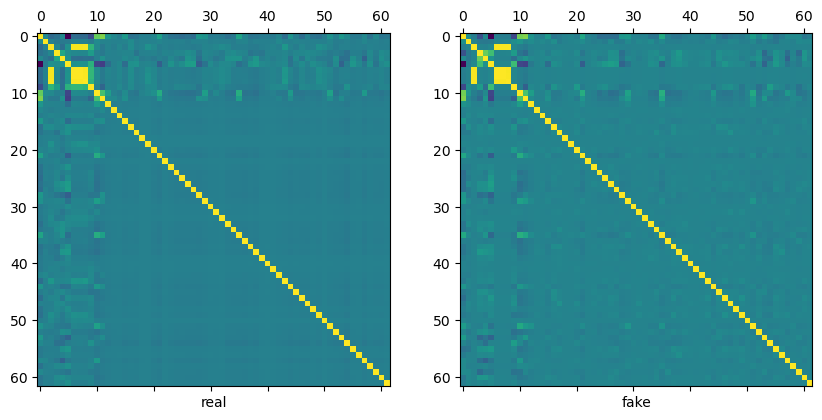

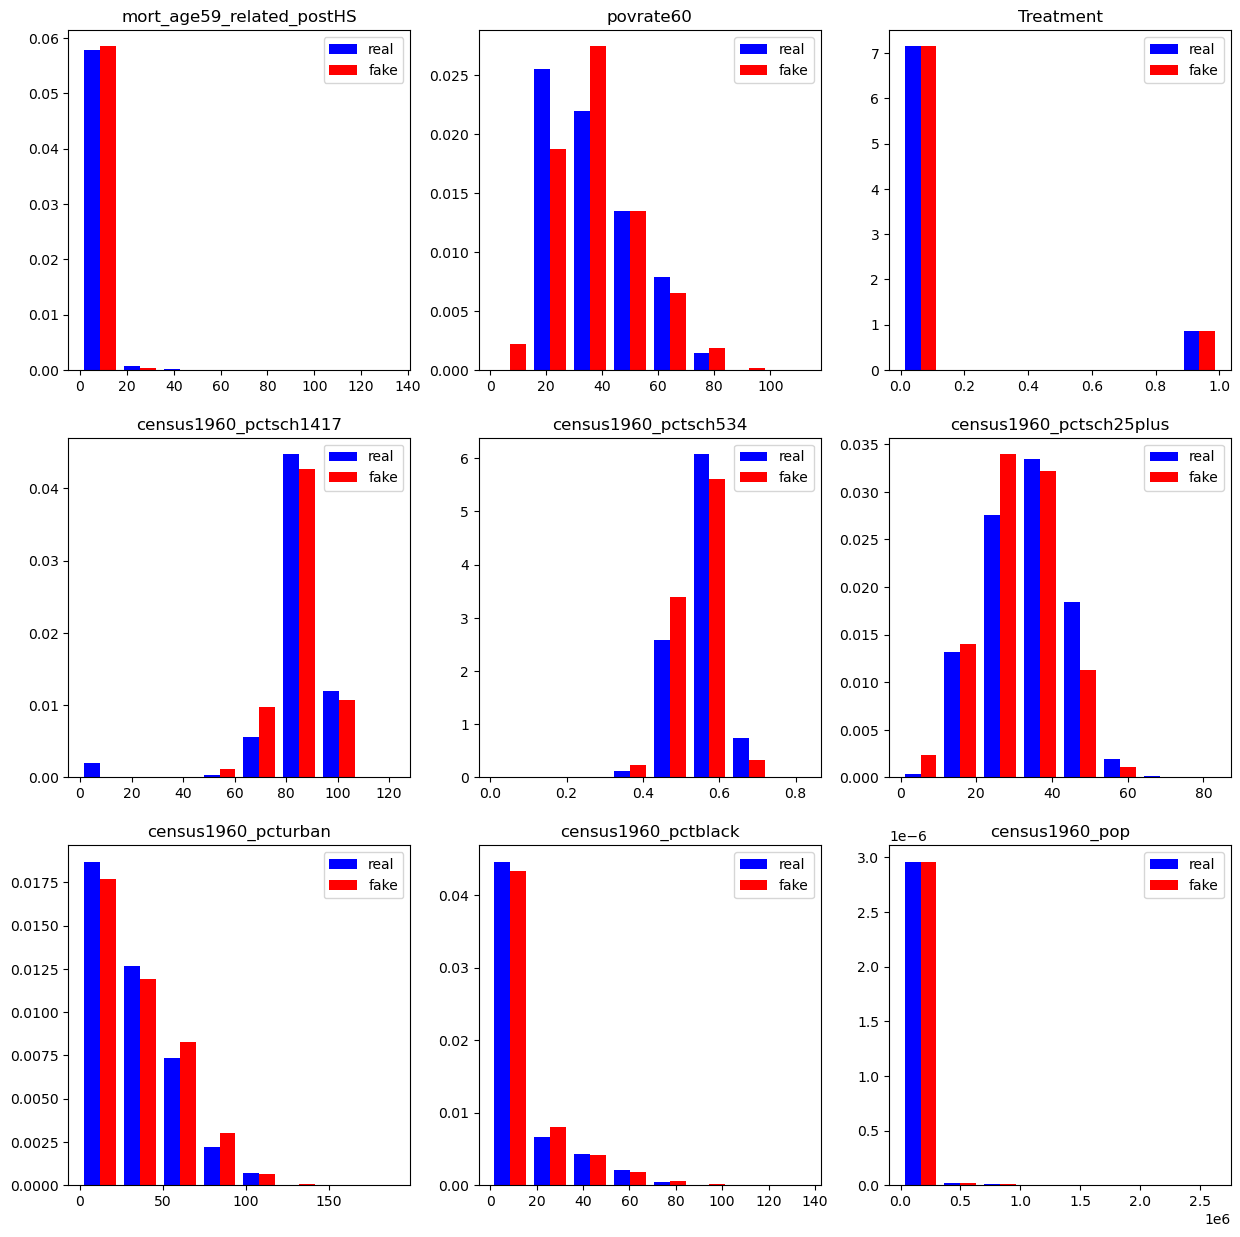

In [154]:
table_groupby = ["Treatment"]
scatterplot = dict(x=[],
                        y=[],
                        samples = 10000)
histogram = dict(variables = continuous_vars1,
                    nrow=3, ncol=3)
#compare_path = path + "compare_"+type
result = wgan.compare_dfs(new_df, df_fake.iloc[:,0:-1], figsize=5,scatterplot=scatterplot, table_groupby=table_groupby,
                    histogram=histogram,save=True,
                       path="D://Moses//Quantile_RDD//Result")

In [157]:
mean_neural = pd.read_csv("D://Moses//Quantile_RDD//Result_stds.txt",delimiter=" ")
mean_neural

,Treatment,0,0.1,1,1.1
0,source,fake,real,fake,real
1,povrate60,11.66,12.04,8.04,5.58
2,mort_age59_related_postHS,2.88,5.83,4.0,4.47
3,census1960_pop,125258.09,123775.25,16206.15,16390.4
4,census1960_pctsch1417,8.94,16.77,8.98,10.75
...,...,...,...,...,...
57,state_47,0.26,0.21,0.2,0.13
58,state_48,0.02,0.1,0.07,0.0
59,state_49,0.19,0.14,0.23,0.08
60,state_50,0.18,0.15,0.04,0.0


In [66]:
mean_neural = pd.read_csv("D://Moses//RDD-Simu//Neural_RDD//Generate_Result_withcontext_stds.txt",delimiter=" ")
mean_neural

,Treatment,0,0.1,1,1.1
0,source,fake,real,fake,real
1,povrate60,11.87,12.04,7.37,5.58
2,mort_age59_related_postHS,2.97,5.83,3.21,4.47
3,census1960_pop,123777.07,123775.25,16291.78,16390.4
4,census1960_pctsch1417,9.87,16.77,10.45,10.75
...,...,...,...,...,...
57,state_47,0.21,0.21,0.15,0.13
58,state_48,0.1,0.1,0.03,0.0
59,state_49,0.18,0.14,0.14,0.08
60,state_50,0.2,0.15,0.04,0.0
